In [1]:
library(ggplot2)
library(psych)
library(dplyr)
library(fmsb)
library(ggradar)
library(plotrix)


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘plotrix’


The following object is masked from ‘package:psych’:

    rescale




In [ ]:
data <- read.csv("scratch//tractoflow_hcp_dwi/UKB_WM_Regionwise_Data_allAtlases_allMeasures.csv")
patient_data <- read.csv("scratch//tractoflow_hcp_dwi/UKBB_patient_data.csv")

In [6]:
ad_all_data <- data[data$WM_Measure == 'AD', ]
fa_all_data <- data[data$WM_Measure == 'FA', ]
md_all_data <- data[data$WM_Measure == 'MD', ]
rd_all_data <- data[data$WM_Measure == 'RD', ]

In [7]:
vec1 <- unique(ad_all_data$Subject_ID)
vec2 <- unique(fa_all_data$Subject_ID)
vec3 <- unique(md_all_data$Subject_ID)
vec4 <- unique(rd_all_data$Subject_ID)

# Find the values that are in vec1 but not in vec2
missing_in_df2 <- setdiff(vec1, vec2)

# Find the values that are in vec2 but not in vec1
missing_in_df1 <- setdiff(vec2, vec1)

# Find the values that are in vec3 but not in vec4
missing_in_df4 <- setdiff(vec3, vec4)

# Find the values that are in vec4 but not in vec3
missing_in_df3 <- setdiff(vec4, vec3)

# Combine the missing values from both directions
all_missing_values <- unique(c(missing_in_df1, missing_in_df2, missing_in_df3, missing_in_df4))

# Display or use the missing values as needed
print(all_missing_values)

[1] 5764457 5765069


In [8]:
indices_to_remove_df1 <- which(fa_all_data$Subject_ID %in% all_missing_values)

# Remove rows from df1
fa_all_data <- fa_all_data[-indices_to_remove_df1, ]

# Find the indices of rows to be removed in df2
indices_to_remove_df2 <- which(md_all_data$Subject_ID %in% all_missing_values)

# Remove rows from df2
md_all_data <- md_all_data[-indices_to_remove_df2, ]

# Find the indices of rows to be removed in df3
indices_to_remove_df3 <- which(rd_all_data$Subject_ID %in% all_missing_values)

# Remove rows from df3
rd_all_data <- rd_all_data[-indices_to_remove_df3, ]

In [9]:
ad_data <- ad_all_data[c("Subject_ID", "WM_Measure", "left_caudate", "right_caudate", "left_putamen", "right_putamen", "left_nucleus_accumbens", "right_nucleus_accumbens", "left_hippocampus", "right_hippocampus", "left_globus_pallidus_externa", "right_globus_pallidus_externa", "left_globus_pallidus_interna", "right_globus_pallidus_Interna")]
fa_data <- fa_all_data[c("Subject_ID", "WM_Measure", "left_caudate", "right_caudate", "left_putamen", "right_putamen", "left_nucleus_accumbens", "right_nucleus_accumbens", "left_hippocampus", "right_hippocampus", "left_globus_pallidus_externa", "right_globus_pallidus_externa", "left_globus_pallidus_interna", "right_globus_pallidus_Interna")]
md_data <- md_all_data[c("Subject_ID", "WM_Measure", "left_caudate", "right_caudate", "left_putamen", "right_putamen", "left_nucleus_accumbens", "right_nucleus_accumbens", "left_hippocampus", "right_hippocampus", "left_globus_pallidus_externa", "right_globus_pallidus_externa", "left_globus_pallidus_interna", "right_globus_pallidus_Interna")]
rd_data <- rd_all_data[c("Subject_ID", "WM_Measure", "left_caudate", "right_caudate", "left_putamen", "right_putamen", "left_nucleus_accumbens", "right_nucleus_accumbens", "left_hippocampus", "right_hippocampus", "left_globus_pallidus_externa", "right_globus_pallidus_externa", "left_globus_pallidus_interna", "right_globus_pallidus_Interna")]

In [10]:
ad_data$caudate <- rowMeans(ad_data[c("left_caudate", "right_caudate")], na.rm = TRUE)
ad_data$putamen <- rowMeans(ad_data[c("left_putamen", "right_putamen")], na.rm = TRUE)
ad_data$nacc <- rowMeans(ad_data[c("left_nucleus_accumbens", "right_nucleus_accumbens")], na.rm = TRUE)
ad_data$hippocampus <- rowMeans(ad_data[c("left_hippocampus", "right_hippocampus")], na.rm = TRUE)
ad_data$pallidum <- rowMeans(ad_data[c("left_globus_pallidus_externa", "right_globus_pallidus_externa", "left_globus_pallidus_interna", "right_globus_pallidus_Interna")], na.rm = TRUE)

fa_data$caudate <- rowMeans(fa_data[c("left_caudate", "right_caudate")], na.rm = TRUE)
fa_data$putamen <- rowMeans(fa_data[c("left_putamen", "right_putamen")], na.rm = TRUE)
fa_data$nacc <- rowMeans(fa_data[c("left_nucleus_accumbens", "right_nucleus_accumbens")], na.rm = TRUE)
fa_data$hippocampus <- rowMeans(fa_data[c("left_hippocampus", "right_hippocampus")], na.rm = TRUE)
fa_data$pallidum <- rowMeans(fa_data[c("left_globus_pallidus_externa", "right_globus_pallidus_externa", "left_globus_pallidus_interna", "right_globus_pallidus_Interna")], na.rm = TRUE)

md_data$caudate <- rowMeans(md_data[c("left_caudate", "right_caudate")], na.rm = TRUE)
md_data$putamen <- rowMeans(md_data[c("left_putamen", "right_putamen")], na.rm = TRUE)
md_data$nacc <- rowMeans(md_data[c("left_nucleus_accumbens", "right_nucleus_accumbens")], na.rm = TRUE)
md_data$hippocampus <- rowMeans(md_data[c("left_hippocampus", "right_hippocampus")], na.rm = TRUE)
md_data$pallidum <- rowMeans(md_data[c("left_globus_pallidus_externa", "right_globus_pallidus_externa", "left_globus_pallidus_interna", "right_globus_pallidus_Interna")], na.rm = TRUE)

rd_data$caudate <- rowMeans(rd_data[c("left_caudate", "right_caudate")], na.rm = TRUE)
rd_data$putamen <- rowMeans(rd_data[c("left_putamen", "right_putamen")], na.rm = TRUE)
rd_data$nacc <- rowMeans(rd_data[c("left_nucleus_accumbens", "right_nucleus_accumbens")], na.rm = TRUE)
rd_data$hippocampus <- rowMeans(rd_data[c("left_hippocampus", "right_hippocampus")], na.rm = TRUE)
rd_data$pallidum <- rowMeans(rd_data[c("left_globus_pallidus_externa", "right_globus_pallidus_externa", "left_globus_pallidus_interna", "right_globus_pallidus_Interna")], na.rm = TRUE)

In [11]:
Q3_c=as.numeric(quantile(ad_data$caudate,0.75, na.rm=TRUE))
Q1_c=as.numeric(quantile(ad_data$caudate,0.25, na.rm=TRUE))
upper_c=Q3_c+(2.2*(Q3_c-Q1_c))
lower_c=Q1_c-(2.2*(Q3_c-Q1_c))
Q3_pu=as.numeric(quantile(ad_data$putamen,0.75, na.rm=TRUE))
Q1_pu=as.numeric(quantile(ad_data$putamen,0.25, na.rm=TRUE))
upper_pu=Q3_pu+(2.2*(Q3_pu-Q1_pu))
lower_pu=Q1_pu-(2.2*(Q3_pu-Q1_pu))
Q3_n=as.numeric(quantile(ad_data$nacc,0.75, na.rm=TRUE))
Q1_n=as.numeric(quantile(ad_data$nacc,0.25, na.rm=TRUE))
upper_n=Q3_n+(2.2*(Q3_n-Q1_n))
lower_n=Q1_n-(2.2*(Q3_n-Q1_n))
Q3_h=as.numeric(quantile(ad_data$hippocampus,0.75, na.rm=TRUE))
Q1_h=as.numeric(quantile(ad_data$hippocampus,0.25, na.rm=TRUE))
upper_h=Q3_h+(2.2*(Q3_h-Q1_h))
lower_h=Q1_h-(2.2*(Q3_h-Q1_h))
Q3_pa=as.numeric(quantile(ad_data$pallidum,0.75, na.rm=TRUE))
Q1_pa=as.numeric(quantile(ad_data$pallidum,0.25, na.rm=TRUE))
upper_pa=Q3_pa+(2.2*(Q3_pa-Q1_pa))
lower_pa=Q1_pa-(2.2*(Q3_pa-Q1_pa))
ad_data$caudate[ad_data$caudate<lower_c]=NA
ad_data$caudate[ad_data$caudate>upper_c]=NA
ad_data$caudate[ad_data$putamen<lower_pu]=NA
ad_data$caudate[ad_data$putamen>upper_pu]=NA
ad_data$caudate[ad_data$nacc<lower_n]=NA
ad_data$caudate[ad_data$nacc>upper_n]=NA
ad_data$caudate[ad_data$hippocampus<lower_h]=NA
ad_data$caudate[ad_data$hippocampus>upper_h]=NA
ad_data$caudate[ad_data$pallidum<lower_pa]=NA
ad_data$caudate[ad_data$pallidum>upper_pa]=NA

Q3_c=as.numeric(quantile(fa_data$caudate,0.75, na.rm=TRUE))
Q1_c=as.numeric(quantile(fa_data$caudate,0.25, na.rm=TRUE))
upper_c=Q3_c+(2.2*(Q3_c-Q1_c))
lower_c=Q1_c-(2.2*(Q3_c-Q1_c))
Q3_pu=as.numeric(quantile(fa_data$putamen,0.75, na.rm=TRUE))
Q1_pu=as.numeric(quantile(fa_data$putamen,0.25, na.rm=TRUE))
upper_pu=Q3_pu+(2.2*(Q3_pu-Q1_pu))
lower_pu=Q1_pu-(2.2*(Q3_pu-Q1_pu))
Q3_n=as.numeric(quantile(fa_data$nacc,0.75, na.rm=TRUE))
Q1_n=as.numeric(quantile(fa_data$nacc,0.25, na.rm=TRUE))
upper_n=Q3_n+(2.2*(Q3_n-Q1_n))
lower_n=Q1_n-(2.2*(Q3_n-Q1_n))
Q3_h=as.numeric(quantile(fa_data$hippocampus,0.75, na.rm=TRUE))
Q1_h=as.numeric(quantile(fa_data$hippocampus,0.25, na.rm=TRUE))
upper_h=Q3_h+(2.2*(Q3_h-Q1_h))
lower_h=Q1_h-(2.2*(Q3_h-Q1_h))
Q3_pa=as.numeric(quantile(fa_data$pallidum,0.75, na.rm=TRUE))
Q1_pa=as.numeric(quantile(fa_data$pallidum,0.25, na.rm=TRUE))
upper_pa=Q3_pa+(2.2*(Q3_pa-Q1_pa))
lower_pa=Q1_pa-(2.2*(Q3_pa-Q1_pa))
fa_data$caudate[fa_data$caudate<lower_c]=NA
fa_data$caudate[fa_data$caudate>upper_c]=NA
fa_data$caudate[fa_data$putamen<lower_pu]=NA
fa_data$caudate[fa_data$putamen>upper_pu]=NA
fa_data$caudate[fa_data$nacc<lower_n]=NA
fa_data$caudate[fa_data$nacc>upper_n]=NA
fa_data$caudate[fa_data$hippocampus<lower_h]=NA
fa_data$caudate[fa_data$hippocampus>upper_h]=NA
fa_data$caudate[fa_data$pallidum<lower_pa]=NA
fa_data$caudate[fa_data$pallidum>upper_pa]=NA

Q3_c=as.numeric(quantile(md_data$caudate,0.75, na.rm=TRUE))
Q1_c=as.numeric(quantile(md_data$caudate,0.25, na.rm=TRUE))
upper_c=Q3_c+(2.2*(Q3_c-Q1_c))
lower_c=Q1_c-(2.2*(Q3_c-Q1_c))
Q3_pu=as.numeric(quantile(md_data$putamen,0.75, na.rm=TRUE))
Q1_pu=as.numeric(quantile(md_data$putamen,0.25, na.rm=TRUE))
upper_pu=Q3_pu+(2.2*(Q3_pu-Q1_pu))
lower_pu=Q1_pu-(2.2*(Q3_pu-Q1_pu))
Q3_n=as.numeric(quantile(md_data$nacc,0.75, na.rm=TRUE))
Q1_n=as.numeric(quantile(md_data$nacc,0.25, na.rm=TRUE))
upper_n=Q3_n+(2.2*(Q3_n-Q1_n))
lower_n=Q1_n-(2.2*(Q3_n-Q1_n))
Q3_h=as.numeric(quantile(md_data$hippocampus,0.75, na.rm=TRUE))
Q1_h=as.numeric(quantile(md_data$hippocampus,0.25, na.rm=TRUE))
upper_h=Q3_h+(2.2*(Q3_h-Q1_h))
lower_h=Q1_h-(2.2*(Q3_h-Q1_h))
Q3_pa=as.numeric(quantile(md_data$pallidum,0.75, na.rm=TRUE))
Q1_pa=as.numeric(quantile(md_data$pallidum,0.25, na.rm=TRUE))
upper_pa=Q3_pa+(2.2*(Q3_pa-Q1_pa))
lower_pa=Q1_pa-(2.2*(Q3_pa-Q1_pa))
md_data$caudate[md_data$caudate<lower_c]=NA
md_data$caudate[md_data$caudate>upper_c]=NA
md_data$caudate[md_data$putamen<lower_pu]=NA
md_data$caudate[md_data$putamen>upper_pu]=NA
md_data$caudate[md_data$nacc<lower_n]=NA
md_data$caudate[md_data$nacc>upper_n]=NA
md_data$caudate[md_data$hippocampus<lower_h]=NA
md_data$caudate[md_data$hippocampus>upper_h]=NA
md_data$caudate[md_data$pallidum<lower_pa]=NA
md_data$caudate[md_data$pallidum>upper_pa]=NA

Q3_c=as.numeric(quantile(rd_data$caudate,0.75, na.rm=TRUE))
Q1_c=as.numeric(quantile(rd_data$caudate,0.25, na.rm=TRUE))
upper_c=Q3_c+(2.2*(Q3_c-Q1_c))
lower_c=Q1_c-(2.2*(Q3_c-Q1_c))
Q3_pu=as.numeric(quantile(rd_data$putamen,0.75, na.rm=TRUE))
Q1_pu=as.numeric(quantile(rd_data$putamen,0.25, na.rm=TRUE))
upper_pu=Q3_pu+(2.2*(Q3_pu-Q1_pu))
lower_pu=Q1_pu-(2.2*(Q3_pu-Q1_pu))
Q3_n=as.numeric(quantile(rd_data$nacc,0.75, na.rm=TRUE))
Q1_n=as.numeric(quantile(rd_data$nacc,0.25, na.rm=TRUE))
upper_n=Q3_n+(2.2*(Q3_n-Q1_n))
lower_n=Q1_n-(2.2*(Q3_n-Q1_n))
Q3_h=as.numeric(quantile(rd_data$hippocampus,0.75, na.rm=TRUE))
Q1_h=as.numeric(quantile(rd_data$hippocampus,0.25, na.rm=TRUE))
upper_h=Q3_h+(2.2*(Q3_h-Q1_h))
lower_h=Q1_h-(2.2*(Q3_h-Q1_h))
Q3_pa=as.numeric(quantile(rd_data$pallidum,0.75, na.rm=TRUE))
Q1_pa=as.numeric(quantile(rd_data$pallidum,0.25, na.rm=TRUE))
upper_pa=Q3_pa+(2.2*(Q3_pa-Q1_pa))
lower_pa=Q1_pa-(2.2*(Q3_pa-Q1_pa))
rd_data$caudate[rd_data$caudate<lower_c]=NA
rd_data$caudate[rd_data$caudate>upper_c]=NA
rd_data$caudate[rd_data$putamen<lower_pu]=NA
rd_data$caudate[rd_data$putamen>upper_pu]=NA
rd_data$caudate[rd_data$nacc<lower_n]=NA
rd_data$caudate[rd_data$nacc>upper_n]=NA
rd_data$caudate[rd_data$hippocampus<lower_h]=NA
rd_data$caudate[rd_data$hippocampus>upper_h]=NA
rd_data$caudate[rd_data$pallidum<lower_pa]=NA
rd_data$caudate[rd_data$pallidum>upper_pa]=NA

In [12]:
colnames(patient_data)[colnames(patient_data) == "eid"] <- "Subject_ID"

In [13]:
subj_data <- patient_data[c("Subject_ID", "sex_31.0.0", "age_when_attended_assessment_centre_21003.2.0", "volume_of_estimatedtotalintracranial_whole_brain_26521.2.0", "uk_biobank_assessment_centre_54.2.0", "mean_tfmri_head_motion_averaged_across_space_and_time_points_25742.2.0", "mean_rfmri_head_motion_averaged_across_space_and_time_points_25741.2.0", "date_of_attending_assessment_centre_53.2.0", "body_mass_index_bmi_21001.2.0", "c.reactive_protein_30710.0.0", "glucose_30740.0.0", "glycated_haemoglobin_hba1c_30750.0.0", "cholesterol_30690.0.0", "hdl_cholesterol_30760.0.0", "ldl_direct_30780.0.0", "triglycerides_30870.0.0", "systolic_blood_pressure_automated_reading_4080.0.1", "diastolic_blood_pressure_automated_reading_4079.0.1")]
ad_subj_data=merge(subj_data, ad_data)
fa_subj_data=merge(subj_data, fa_data)
md_subj_data=merge(subj_data, md_data)
rd_subj_data=merge(subj_data, rd_data)

In [14]:
hypo_ad <- read.csv("scratch//tractoflow_hcp_dwi//linear_regression/UKBB_ad_data.csv")
hypo_fa <- read.csv("scratch//tractoflow_hcp_dwi//linear_regression/UKBB_fa_data.csv")
hypo_md <- read.csv("scratch//tractoflow_hcp_dwi//linear_regression/UKBB_md_data.csv")
hypo_rd <- read.csv("scratch//tractoflow_hcp_dwi//linear_regression/UKBB_rd_data.csv")

In [15]:
indices_to_remove_df1 <- which(hypo_fa$eid %in% all_missing_values)

# Remove rows from df1
hypo_fa <- hypo_fa[-indices_to_remove_df1, ]

# Find the indices of rows to be removed in df2
indices_to_remove_df2 <- which(hypo_md$eid %in% all_missing_values)

# Remove rows from df2
hypo_md <- hypo_md[-indices_to_remove_df2, ]

# Find the indices of rows to be removed in df3
indices_to_remove_df3 <- which(hypo_rd$eid %in% all_missing_values)

# Remove rows from df3
hypo_rd <- hypo_rd[-indices_to_remove_df3, ]

In [17]:
ad_subj_data$full_hypo <- hypo_ad$full_hypo
fa_subj_data$full_hypo <- hypo_fa$full_hypo
md_subj_data$full_hypo <- hypo_md$full_hypo
rd_subj_data$full_hypo <- hypo_rd$full_hypo

In [18]:
Q3=as.numeric(quantile(ad_subj_data$full_hypo,0.75, na.rm=TRUE))
Q1=as.numeric(quantile(ad_subj_data$full_hypo,0.25, na.rm=TRUE))
upper=Q3+(2.2*(Q3-Q1))
lower=Q1-(2.2*(Q3-Q1))
ad_subj_data$full_hypo[ad_subj_data$full_hypo<lower]=NA
ad_subj_data$full_hypo[ad_subj_data$full_hypo>upper]=NA

Q3=as.numeric(quantile(fa_subj_data$full_hypo,0.75, na.rm=TRUE))
Q1=as.numeric(quantile(fa_subj_data$full_hypo,0.25, na.rm=TRUE))
upper=Q3+(2.2*(Q3-Q1))
lower=Q1-(2.2*(Q3-Q1))
fa_subj_data$full_hypo[fa_subj_data$full_hypo<lower]=NA
fa_subj_data$full_hypo[fa_subj_data$full_hypo>upper]=NA

Q3=as.numeric(quantile(md_subj_data$full_hypo,0.75, na.rm=TRUE))
Q1=as.numeric(quantile(md_subj_data$full_hypo,0.25, na.rm=TRUE))
upper=Q3+(2.2*(Q3-Q1))
lower=Q1-(2.2*(Q3-Q1))
md_subj_data$full_hypo[md_subj_data$full_hypo<lower]=NA
md_subj_data$full_hypo[md_subj_data$full_hypo>upper]=NA

Q3=as.numeric(quantile(rd_subj_data$full_hypo,0.75, na.rm=TRUE))
Q1=as.numeric(quantile(rd_subj_data$full_hypo,0.25, na.rm=TRUE))
upper=Q3+(2.2*(Q3-Q1))
lower=Q1-(2.2*(Q3-Q1))
rd_subj_data$full_hypo[rd_subj_data$full_hypo<lower]=NA
rd_subj_data$full_hypo[rd_subj_data$full_hypo>upper]=NA

In [19]:
mean(ad_subj_data$age_when_attended_assessment_centre_21003.2.0, na.rm=TRUE)

[1] 63.38156

In [20]:
write.csv(ad_subj_data, "scratch/tractoflow_hcp_dwi/linear_regression/UKBB_ad_data_other.csv")
write.csv(fa_subj_data, "scratch/tractoflow_hcp_dwi/linear_regression/UKBB_fa_data_other.csv")
write.csv(md_subj_data, "scratch/tractoflow_hcp_dwi/linear_regression/UKBB_md_data_other.csv")
write.csv(rd_subj_data, "scratch/tractoflow_hcp_dwi/linear_regression/UKBB_rd_data_other.csv")

In [1]:
ad_subj_data <- read.csv("scratch/tractoflow_hcp_dwi/linear_regression/UKBB_ad_data_other.csv")
fa_subj_data <- read.csv("scratch/tractoflow_hcp_dwi/linear_regression/UKBB_fa_data_other.csv")
md_subj_data <- read.csv("scratch/tractoflow_hcp_dwi/linear_regression/UKBB_md_data_other.csv")
rd_subj_data <- read.csv("scratch/tractoflow_hcp_dwi/linear_regression/UKBB_rd_data_other.csv")

In [4]:
sd(ad_subj_data$age_when_attended_assessment_centre_21003.2.0, na.rm=TRUE)

[1] 7.539509

In [26]:
subject_data <- list(ad_subj_data, fa_subj_data, md_subj_data, rd_subj_data)
subject_datasets <- c("ad", "fa", "md", "rd")
brain_regions <- c("caudate", "putamen", "nacc", "hippocampus", "pallidum", "full_hypo")
vars <- c("BMI", "CRP", "Glucose", "HBA1C", "Cholesterol", "HDL_Chol", "LDL_Chol", "Triglycerides", "Systolic_BP", "Diastolic_BP")
variables <- c("body_mass_index_bmi_21001.2.0", "c.reactive_protein_30710.0.0", 
                        "glucose_30740.0.0", "glycated_haemoglobin_hba1c_30750.0.0", 
                        "cholesterol_30690.0.0", "hdl_cholesterol_30760.0.0", 
                        "ldl_direct_30780.0.0", "triglycerides_30870.0.0", 
                        "systolic_blood_pressure_automated_reading_4080.0.1", 
                        "diastolic_blood_pressure_automated_reading_4079.0.1")
all_data_summary <- data.frame()

In [27]:
for (i in seq_along(subject_data)) {
    current_data <- subject_data[[i]]
    j=1
    for (region in brain_regions) {
        k=1
        for (variable in variables) {
            lm_model <- lm(get(region) ~ get(variable) + 
                           age_when_attended_assessment_centre_21003.2.0 + 
                           poly(age_when_attended_assessment_centre_21003.2.0, 2, raw=TRUE) * sex_31.0.0 +
                           poly(difftime(as.Date(date_of_attending_assessment_centre_53.2.0),
                                min(as.Date(date_of_attending_assessment_centre_53.2.0)), units='days'), 2, raw=TRUE) + 
                           uk_biobank_assessment_centre_54.2.0 + 
                           volume_of_estimatedtotalintracranial_whole_brain_26521.2.0, data = current_data)
            summary_model <- summary(lm_model)
            values <- data.frame(summary_model$coefficients[2,])
            values <- as.data.frame(t(values))
            values$metric <- subject_datasets[i]
            values$region <- region
            values$measure <- vars[k]
            row_name <- paste(subject_datasets[i],"_", region, "_", variable)
            rownames(values) <- row_name 
            all_data_summary <- rbind(all_data_summary, values)
            k=k+1
        j=j+1
        }
    }
}


In [28]:
write.csv(all_data_summary, "scratch/tractoflow_hcp_dwi/linear_regression/UKBB_all_data_summary.csv")

In [29]:
all_data_summary <- read.csv("scratch/tractoflow_hcp_dwi/linear_regression/UKBB_all_data_summary.csv")
all_data_summary

X,Estimate,Std..Error,t.value,Pr...t..,metric,region,measure
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
ad _ caudate _ body_mass_index_bmi_21001.2.0,2.311186e-06,2.418812e-07,9.55504644,1.358301e-21,ad,caudate,BMI
ad _ caudate _ c.reactive_protein_30710.0.0,6.651719e-06,8.667845e-07,7.67401718,1.741422e-14,ad,caudate,CRP
ad _ caudate _ glucose_30740.0.0,5.338253e-06,1.907580e-06,2.79844223,5.140055e-03,ad,caudate,Glucose
ad _ caudate _ glycated_haemoglobin_hba1c_30750.0.0,1.006483e-06,2.829228e-07,3.55744790,3.752867e-04,ad,caudate,HBA1C
ad _ caudate _ cholesterol_30690.0.0,3.138922e-06,9.401646e-07,3.33869442,8.431400e-04,ad,caudate,Cholesterol
ad _ caudate _ hdl_cholesterol_30760.0.0,-2.441762e-06,3.067907e-06,-0.79590498,4.260968e-01,ad,caudate,HDL_Chol
ad _ caudate _ ldl_direct_30780.0.0,3.458349e-06,1.213896e-06,2.84896646,4.390263e-03,ad,caudate,LDL_Chol
ad _ caudate _ triglycerides_30870.0.0,7.924137e-06,1.333812e-06,5.94096897,2.877336e-09,ad,caudate,Triglycerides
ad _ caudate _ systolic_blood_pressure_automated_reading_4080.0.1,4.156801e-07,6.035859e-08,6.88684282,5.862804e-12,ad,caudate,Systolic_BP


In [30]:
all_data_summary$p_fdr = p.adjust(all_data_summary$Pr...t.., method="fdr")
all_data_summary

X,Estimate,Std..Error,t.value,Pr...t..,metric,region,measure,p_fdr
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
ad _ caudate _ body_mass_index_bmi_21001.2.0,2.311186e-06,2.418812e-07,9.55504644,1.358301e-21,ad,caudate,BMI,2.963565e-20
ad _ caudate _ c.reactive_protein_30710.0.0,6.651719e-06,8.667845e-07,7.67401718,1.741422e-14,ad,caudate,CRP,1.990197e-13
ad _ caudate _ glucose_30740.0.0,5.338253e-06,1.907580e-06,2.79844223,5.140055e-03,ad,caudate,Glucose,1.713352e-02
ad _ caudate _ glycated_haemoglobin_hba1c_30750.0.0,1.006483e-06,2.829228e-07,3.55744790,3.752867e-04,ad,caudate,HBA1C,1.699411e-03
ad _ caudate _ cholesterol_30690.0.0,3.138922e-06,9.401646e-07,3.33869442,8.431400e-04,ad,caudate,Cholesterol,3.613457e-03
ad _ caudate _ hdl_cholesterol_30760.0.0,-2.441762e-06,3.067907e-06,-0.79590498,4.260968e-01,ad,caudate,HDL_Chol,6.724962e-01
ad _ caudate _ ldl_direct_30780.0.0,3.458349e-06,1.213896e-06,2.84896646,4.390263e-03,ad,caudate,LDL_Chol,1.559495e-02
ad _ caudate _ triglycerides_30870.0.0,7.924137e-06,1.333812e-06,5.94096897,2.877336e-09,ad,caudate,Triglycerides,2.227615e-08
ad _ caudate _ systolic_blood_pressure_automated_reading_4080.0.1,4.156801e-07,6.035859e-08,6.88684282,5.862804e-12,ad,caudate,Systolic_BP,5.411819e-11


In [6]:
sig_data <- all_data_summary
BMI_sig_data <- sig_data[sig_data$measure == 'BMI',] 
CRP_sig_data <- sig_data[sig_data$measure == 'CRP',] 
glucose_sig_data <- sig_data[sig_data$measure == 'Glucose',] 
hba1c_sig_data <- sig_data[sig_data$measure == 'HBA1C',] 
chol_sig_data <- sig_data[sig_data$measure == 'Cholesterol',] 
hdl_chol_sig_data <- sig_data[sig_data$measure == 'HDL_Chol',] 
ldl_chol_sig_data <- sig_data[sig_data$measure == 'LDL_Chol',] 
triglycerides_sig_data <- sig_data[sig_data$measure == 'Triglycerides',] 
sys_bp_sig_data <- sig_data[sig_data$measure == 'Systolic_BP',] 
dia_bp_sig_data <- sig_data[sig_data$measure == 'Diastolic_BP',] 

ad_caudate_data <- sig_data[sig_data$region == 'caudate',] 
ad_putamen_data <- sig_data[sig_data$region == 'putamen',] 
ad_nacc_data <- sig_data[sig_data$region == 'nacc',] 
ad_hippocampus_data <- sig_data[sig_data$region == 'hippocampus',] 
ad_pallidum_data <- sig_data[sig_data$region == 'pallidum',] 
ad_full_hypyo_data <- sig_data[sig_data$region == 'full_hypo',] 


ad_caudate_sig_data <- sig_data[sig_data$metric == 'ad' & sig_data$region == 'caudate',] 
fa_caudate_sig_data <- sig_data[sig_data$metric == 'fa' & sig_data$region == 'caudate',] 
md_caudate_sig_data <- sig_data[sig_data$metric == 'md' & sig_data$region == 'caudate',] 
rd_caudate_sig_data <- sig_data[sig_data$metric == 'rd' & sig_data$region == 'caudate',] 

ad_putamen_sig_data <- sig_data[sig_data$metric == 'ad' & sig_data$region == 'putamen',] 
fa_putamen_sig_data <- sig_data[sig_data$metric == 'fa' & sig_data$region == 'putamen',] 
md_putamen_sig_data <- sig_data[sig_data$metric == 'md' & sig_data$region == 'putamen',] 
rd_putamen_sig_data <- sig_data[sig_data$metric == 'rd' & sig_data$region == 'putamen',]

ad_nacc_sig_data <- sig_data[sig_data$metric == 'ad' & sig_data$region == 'nacc',] 
fa_nacc_sig_data <- sig_data[sig_data$metric == 'fa' & sig_data$region == 'nacc',] 
md_nacc_sig_data <- sig_data[sig_data$metric == 'md' & sig_data$region == 'nacc',] 
rd_nacc_sig_data <- sig_data[sig_data$metric == 'rd' & sig_data$region == 'nacc',]

ad_hippocampus_sig_data <- sig_data[sig_data$metric == 'ad' & sig_data$region == 'hippocampus',] 
fa_hippocampus_sig_data <- sig_data[sig_data$metric == 'fa' & sig_data$region == 'hippocampus',] 
md_hippocampus_sig_data <- sig_data[sig_data$metric == 'md' & sig_data$region == 'hippocampus',] 
rd_hippocampus_sig_data <- sig_data[sig_data$metric == 'rd' & sig_data$region == 'hippocampus',]

ad_pallidum_sig_data <- sig_data[sig_data$metric == 'ad' & sig_data$region == 'pallidum',] 
fa_pallidum_sig_data <- sig_data[sig_data$metric == 'fa' & sig_data$region == 'pallidum',] 
md_pallidum_sig_data <- sig_data[sig_data$metric == 'md' & sig_data$region == 'pallidum',] 
rd_pallidum_sig_data <- sig_data[sig_data$metric == 'rd' & sig_data$region == 'pallidum',]

ad_full_hypo_sig_data <- sig_data[sig_data$metric == 'ad' & sig_data$region == 'full_hypo',] 
fa_full_hypo_sig_data <- sig_data[sig_data$metric == 'fa' & sig_data$region == 'full_hypo',] 
md_full_hypo_sig_data <- sig_data[sig_data$metric == 'md' & sig_data$region == 'full_hypo',] 
rd_full_hypo_sig_data <- sig_data[sig_data$metric == 'rd' & sig_data$region == 'full_hypo',]

In [7]:
max_t <- max(sig_data$t.value)
min_t <- min(sig_data$t.value)

In [8]:
max_min <- data.frame(
    BMI = c(max_t, min_t), CRP = c(max_t, min_t), Glucose = c(max_t, min_t), 
    HBA1C = c(max_t, min_t), Cholesterol = c(max_t, min_t), HDL_Chol = c(max_t, min_t),
    LDL_Chol = c(max_t, min_t), Triglycerides = c(max_t, min_t), 
    Systolic_BP = c(max_t, min_t), Diastolic_BP = c(max_t, min_t)
)

In [9]:
max_min

BMI,CRP,Glucose,HBA1C,Cholesterol,HDL_Chol,LDL_Chol,Triglycerides,Systolic_BP,Diastolic_BP
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
26.50247,26.50247,26.50247,26.50247,26.50247,26.50247,26.50247,26.50247,26.50247,26.50247
-14.88763,-14.88763,-14.88763,-14.88763,-14.88763,-14.88763,-14.88763,-14.88763,-14.88763,-14.88763


In [10]:
vars <- c("BMI", "CRP", "Glucose", "HBA1C", "Cholesterol", "HDL_Chol", "LDL_Chol", "Triglycerides", "Systolic_BP", "Diastolic_BP")
ad_caudate <- data.frame(t(ad_caudate_sig_data$t.value))
colnames(ad_caudate) = vars
fa_caudate <- data.frame(t(fa_caudate_sig_data$t.value))
colnames(fa_caudate) = vars
md_caudate <- data.frame(t(md_caudate_sig_data$t.value))
colnames(md_caudate) = vars
rd_caudate <- data.frame(t(rd_caudate_sig_data$t.value))
colnames(rd_caudate) = vars


In [11]:
caudate <- bind_rows(max_min, ad_caudate)
caudate <- bind_rows(caudate, fa_caudate)
caudate <- bind_rows(caudate, md_caudate)
caudate <- bind_rows(caudate, rd_caudate)

In [12]:
significant_data <- subset(sig_data, Pr...t.. > 0.05)

min_t_val<- min(significant_data$t.value, na.rm = TRUE)
max_t_val<- max(significant_data$t.value, na.rm = TRUE)

In [13]:
t_min <- data.frame(t(data.frame(replicate(length(vars), min_t_val))))
colnames(t_min) <- vars
t_max <- data.frame(t(data.frame(replicate(length(vars), max_t_val))))
colnames(t_max) <- vars
caudate <- bind_rows(caudate, t_min)
caudate <- bind_rows(caudate, t_max)
rownames(caudate) = c("Max", "Min", "AD", "FA", "MD", "RD", "Min_T", "Max_T")
caudate

,BMI,CRP,Glucose,HBA1C,Cholesterol,HDL_Chol,LDL_Chol,Triglycerides,Systolic_BP,Diastolic_BP
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Max,26.502470,26.502470,26.5024701,26.502470,26.502470,26.5024701,26.502470,26.5024701,26.502470,26.502470
Min,-14.887627,-14.887627,-14.8876267,-14.887627,-14.887627,-14.8876267,-14.887627,-14.8876267,-14.887627,-14.887627
AD,9.555046,7.674017,2.7984422,3.557448,3.338694,-0.7959050,2.848966,5.9409690,6.886843,8.577987
FA,-4.428919,-2.666196,0.6331281,1.675471,2.341603,0.1991551,2.456948,0.9799071,-10.871478,-14.887627
MD,9.251260,7.353196,2.8420663,3.219262,2.741235,-0.6358133,2.153786,5.5060239,6.839641,8.804413
RD,9.114857,7.195893,2.6999955,3.138103,3.076545,-0.3527060,2.411544,5.5033278,7.125987,9.453892
Min_T,-1.880683,-1.880683,-1.8806827,-1.880683,-1.880683,-1.8806827,-1.880683,-1.8806827,-1.880683,-1.880683
Max_T,1.918287,1.918287,1.9182871,1.918287,1.918287,1.9182871,1.918287,1.9182871,1.918287,1.918287


In [15]:
colnames(ad_caudate)

[1] "BMI"           "CRP"           "Glucose"       "HBA1C"        
 [5] "Cholesterol"   "HDL_Chol"      "LDL_Chol"      "Triglycerides"
 [9] "Systolic_BP"   "Diastolic_BP"

In [13]:
plty_vector[grep("Min_T|Max_T", names(caudate_data))] <- 2

ERROR: Error: object 'plty_vector' not found


In [14]:
plty_vector

ERROR: Error in eval(expr, envir, enclos): object 'plty_vector' not found


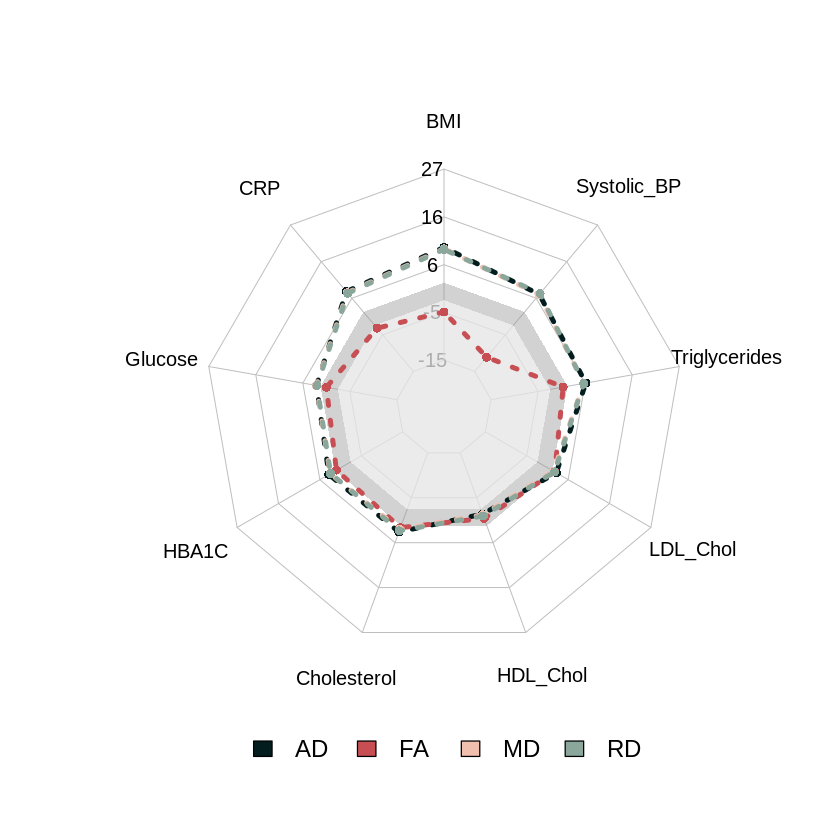

In [162]:
caudate_data <- caudate[c("Max", "Min", "Max_T", "Min_T", "AD", "FA", "MD", "RD"), ]

my_colors <- c( "grey", "grey","#031d1e", "#c74f54", "#f1bfad", "#8ba79b")

radarchart(
  caudate_data[, -ncol(caudate_data)],  
  axistype = 1, 
  caxislabels = round(seq(min_t, max_t, ((max_t - min_t) / 4))),
  pcol = my_colors,
  pfcol = c("#99999970","#ffffff90",NA, NA, NA, NA),
  pty = c(32 ,32 ,16, 16, 16, 16),
  plwd = c(1,1,4,4,4,4),  
  plty = c(0,0,3,3,3,3),
  cglcol = "grey", 
  cglty = 1,  
  cglwd = 0.8,
  axislabcol='black',
  seg=4,
  calcex=1
)

legend(
  "bottom", 
  legend = rownames(caudate_data[-c(1, 2, 3, 4), ]),
  fill = my_colors[3:6],
  bty = "n",
  ncol = length(rownames(caudate_data[-c(1, 2, 3, 4), ])),  
  cex = 1.2,
  inset = c(0, -0.1), 
  xpd = TRUE  
)